<a href="https://colab.research.google.com/github/beriaacan/Predict-Bike-Demand/blob/main/Predict_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Predict Bike Demand </h1>
RideIt is a Washington, D.C based bike-sharing service (application) that allows users to rent a bike from one place and leave it somewhere else. Bike sharing is a process that is highly correlated to seasonal and environmental factors like the day of the week, weather conditions, season, etc. The company is interested in building a system that will help them predict the hourly rental count in order to effectively manage demand and supply.

There is historical data collected through the app. The data consists of seasonal and weather information, among other features, on an hourly basis.

Using machine learning, build a model to predict rental count and analyze which factors contribute the most in making this prediction.   

<h3> Files: </h3>

train.csv - data used for training along with target variable

test.csv – data on which predictions are to be made

sample_submission.csv – sample format of submission

<h3> Problem: </h3>

Perform an analysis of the given data to determine how different features are related to the demand.  Build a machine learning model that can predict the demand.



For each record in the test set (test.csv), predict the value of the demand variable. Submit a CSV file with a header row plus each of the test entries, each on its own line.



The file (submissions.csv) should have exactly 2 columns:
- id
- demand

<h3> Deliverables: </h3>

Well commented Jupyter notebook
“submissions.csv”


 Explore the data, make visualizations, and generate new features if required. Make appropriate plots, annotate the notebook with markdowns and explain necessary inferences. A person should be able to read the notebook and understand the steps taken as well as the reasoning behind them. The solution will be graded on the basis of usage of effective visualizations to convey the analysis and the modeling process.


<h3> Evaluation Metric: </h3>

The metric used for evaluating the performance of Mean Absolute Error.

MAE = Mean of absolute of differences between actuals and prediction

In [130]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
FOLDERNAME ='Predict Bike Demand/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [132]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [133]:
train= pd.read_csv('drive/MyDrive/Predict Bike Demand/train.csv')
#drive/MyDrive/Predict Bike Demand/train.csv
test= pd.read_csv('drive/MyDrive/Predict Bike Demand/test.csv')


In [134]:
pd.set_option("display.max_columns", 101)

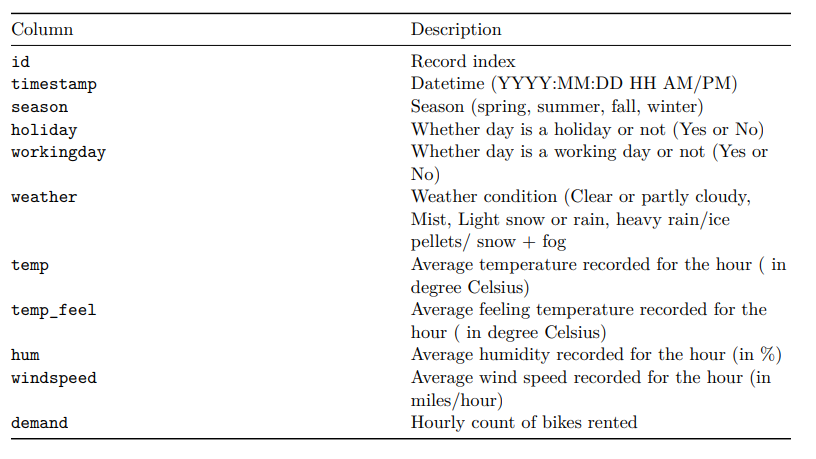


atemp=temp_feel

In [135]:
# The dataset is already loaded below
data = pd.read_csv("drive/MyDrive/Predict Bike Demand/train.csv")


In [136]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [137]:
#Description
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [138]:
#Explore columns
data.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [139]:
data.isnull().sum() #for checking missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [141]:
# You can create additional features like 'hour', 'month', 'day of week', etc., from the 'datetime' column.

data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day_name()
# data['day_of_week'] = data['datetime'].dt.dayofweek #also shows the day of week (1=sunday etc.)
data['year'] = data['datetime'].dt.year

In [142]:
# Replace the values in the 'season' column with corresponding strings
data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
data['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
data['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
data['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

In [143]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'day', 'year'],
      dtype='object')

In [144]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,year
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,3,13,16,0,1,Saturday,2011
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,2011
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,5,27,32,2,1,Saturday,2011
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,3,10,13,3,1,Saturday,2011
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,0,1,1,4,1,Saturday,2011


In [145]:
# Categorical columns. To improve data clarity
categorical_features = data[['season', 'holiday', 'workingday', 'weather',  'hour', 'month',  'year','day']]

for i in categorical_features:
    print(data[i].value_counts())
    print('-' * 50)

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64
--------------------------------------------------
Not Holiday    10575
Holiday          311
Name: holiday, dtype: int64
--------------------------------------------------
Workingday        7412
Not Workingday    3474
Name: workingday, dtype: int64
--------------------------------------------------
Clear    7192
Mist     2834
Rain      859
Snow        1
Name: weather, dtype: int64
--------------------------------------------------
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64
--------------------------------------------------
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64
----------------

<h1> Observation: </h1>

* **Mixed Weather Categories:**
The first observation points out that having a single value for 'snow' in the dataset could potentially impact our analysis negatively. To address this, it was decided to combine 'snow' with the 'rain' category within the same column. This acknowledges that snow and rain have similar effects and makes the analysis more consistent and meaningful.

* **Distinguishing Working Day, Holiday, and Weekend:**
The second observation highlights a discrepancy between the 'holiday' and 'not-workingday' variables. It clarifies that the term 'workingday' refers to days that are neither weekends nor holidays. Additionally, the dataset contains cases where neither 'workingday' nor 'holiday' applies. This underscores the need for a third variable: 'weekend.' This variable summarizes scenarios where neither work nor vacation is active, effectively representing a 'weekend.' This subtle distinction clarifies that 'holiday' specifically refers to public holidays, distinct from 'weekend' holidays.

In [146]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
data['weather'] = data['weather'].replace(cluster_mapping)

# Check the value_counts for the weather after replacing
data['weather'].value_counts()

Clear    7192
Mist     2834
Rain      860
Name: weather, dtype: int64

In [147]:
# Filter rows where 'workingday' is equal to 'Workingday'
workingDay = data[data['workingday'] == 'Workingday']

# Filter rows where 'holiday' is equal to 'Holiday'
holiDay = data[data['holiday'] == 'Holiday']

# Filter rows where 'holiday' is not 'Holiday' and 'workingday' is not 'Workingday'
weekEnd = data[(data['holiday'] == 'Not Holiday') & (data['workingday'] == 'Not Workingday')]

In [148]:
# Numerical columns.
numerical_features = train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Wind speed and humidity variables cannot be zero. Zeros are replaced with more reasonable values.

In [149]:
# Get the count of the minimum value
count_of_min_value = data[data['humidity']==0].shape[0]

count_of_min_value

22

In [150]:
# Filter rows with the minimum value
min_value_rows = data[data['humidity'] == 0]

min_value_rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,year
1091,2011-03-10 00:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,3,0,3,0,3,Thursday,2011
1092,2011-03-10 01:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,2,2,1,3,Thursday,2011
1093,2011-03-10 02:00:00,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,1,1,2,3,Thursday,2011
1094,2011-03-10 05:00:00,Spring,Not Holiday,Workingday,Rain,14.76,17.425,0,12.9980,1,2,3,5,3,Thursday,2011
1095,2011-03-10 06:00:00,Spring,Not Holiday,Workingday,Rain,14.76,16.665,0,22.0028,0,12,12,6,3,Thursday,2011
1096,2011-03-10 07:00:00,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,15.0013,1,36,37,7,3,Thursday,2011
1097,2011-03-10 08:00:00,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,19.0012,1,43,44,8,3,Thursday,2011
1098,2011-03-10 09:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,15.0013,1,23,24,9,3,Thursday,2011
1099,2011-03-10 10:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,11.0014,0,17,17,10,3,Thursday,2011
1100,2011-03-10 11:00:00,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,16.9979,6,5,11,11,3,Thursday,2011


All these occurrences were documented on the same day, implying a possible recording anomaly regarding the humidity data for that day.

To rectify this issue, we substituted these instances with a suitable value. Since the day was predominantly rainy, we computed an average humidity value for rainy conditions from the dataset and employed it to replace the zero values. This method guarantees data consistency and precision, even in the presence of recording irregularities.

In [151]:
# Get the count of the minimum value
count_of_min_value = data[data['windspeed']==0].shape[0]

count_of_min_value

1313

In [152]:
# Filter rows where the weather is 'Rain'
rain_weather = data[data['weather'] == 'Rain']

# Calculate the mean humidity for rows with 'Rain' weather
mean_rain_weather_humidity = rain_weather['humidity'].mean()

# Replace 0 values in the 'humidity' column with the calculated mean for 'Rain' weather
data['humidity'] = data['humidity'].replace(0, mean_rain_weather_humidity)

# Check the minimum value in the 'humidity' column after replacing 0 values
data['humidity'].min()

8.0

In [153]:
# Get the count of the minimum value
count_of_min_value = data[data['windspeed']==0].shape[0]

count_of_min_value

1313

In [154]:
# Filter rows with the minimum value
min_value_rows = data[data['windspeed'] == 0]

min_value_rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,year
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,Saturday,2011
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,0.0,8,32,40,1,1,Saturday,2011
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,0.0,5,27,32,2,1,Saturday,2011
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,0.0,3,10,13,3,1,Saturday,2011
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,0.0,0,1,1,4,1,Saturday,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,Winter,Not Holiday,Workingday,Mist,16.40,20.455,87.0,0.0,21,211,232,12,12,Monday,2012
10829,2012-12-17 15:00:00,Winter,Not Holiday,Workingday,Mist,17.22,21.210,88.0,0.0,15,196,211,15,12,Monday,2012
10846,2012-12-18 08:00:00,Winter,Not Holiday,Workingday,Clear,15.58,19.695,94.0,0.0,10,652,662,8,12,Tuesday,2012
10860,2012-12-18 22:00:00,Winter,Not Holiday,Workingday,Clear,13.94,16.665,49.0,0.0,5,127,132,22,12,Tuesday,2012


No data was discovered that could be linked to the absence of wind in this context. Consequently, to enhance the data's significance, zero values were adjusted to align with the minimum value.

In [155]:
# Replace zero 'windspeed with the values above or below
data['windspeed'] = data['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

# Check the minimum value in the 'windspeed' column after replacing 0 values
data['windspeed'].min()

6.0032

<h1> Data Visualiation and Analysis </h1>


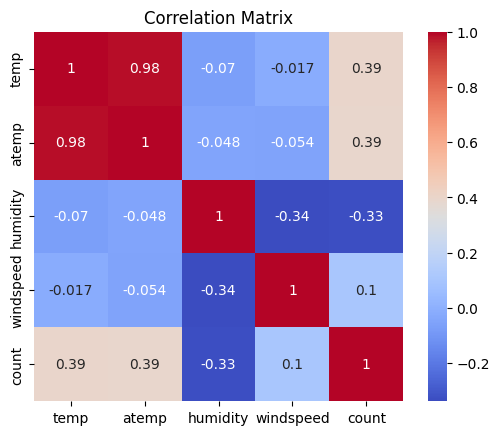

In [156]:
# Calculate the correlation matrix for the selected numerical features in the 'data' DataFrame.
correlation_matrix = data[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix,annot=True,  cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

As evident from the chart above,

1. We observe a strong correlation between the 'temp' and 'atemp' columns, suggesting that they essentially represent the same feature. Therefore, it is advisable to eliminate one of them to avoid redundancy.

2. The 'temp' column exhibits a mild positive correlation (0.39) with the target variable 'count,' while the 'humidity' column displays a slight negative correlation (-0.32) with the target. However, there appears to be no meaningful correlation between 'windspeed' and the target variable (0.1).

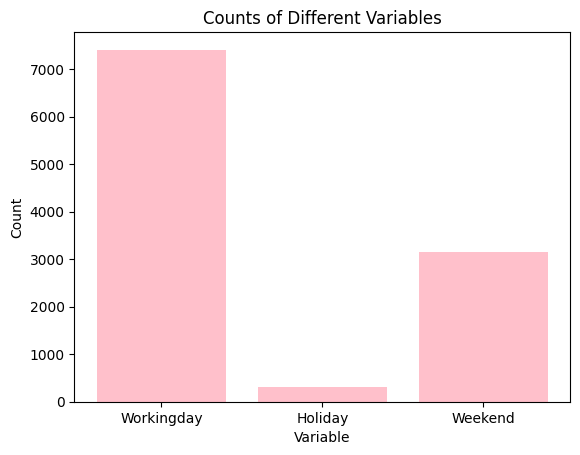

In [180]:
# Calculate counts
counts = [workingDay.shape[0], holiDay.shape[0], weekEnd.shape[0]]
labels = ['Workingday', 'Holiday', 'Weekend']

# Create a bar chart
plt.bar(labels, counts, color='pink')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Counts of Different Variables')
plt.show()

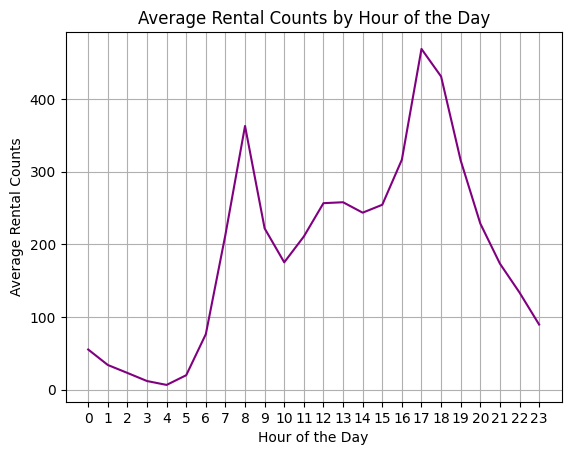

In [170]:
# Calculate the average rental counts by hour of the day
hourly_counts = data.groupby('hour')['count'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
sns.lineplot(x='hour', y='count', data=hourly_counts,color='purple' )
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

Text(0, 0.5, 'Mean Count')

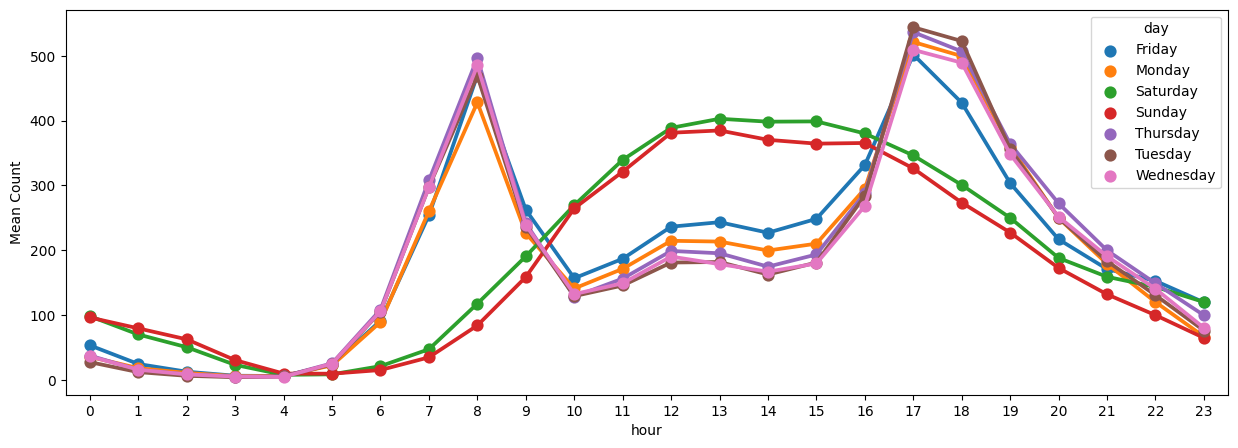

In [159]:
# Plot the mean rental counts per hour based on day of the week
plt.figure(figsize=(15, 5))
hour_day_df = data.groupby(["hour", "day"])["count"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["count"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")

In [160]:
# Extracting unique days from the 'day' column of the 'weekEnd' DataFrame
weekEnd['day'].unique()

array(['Saturday', 'Sunday'], dtype=object)

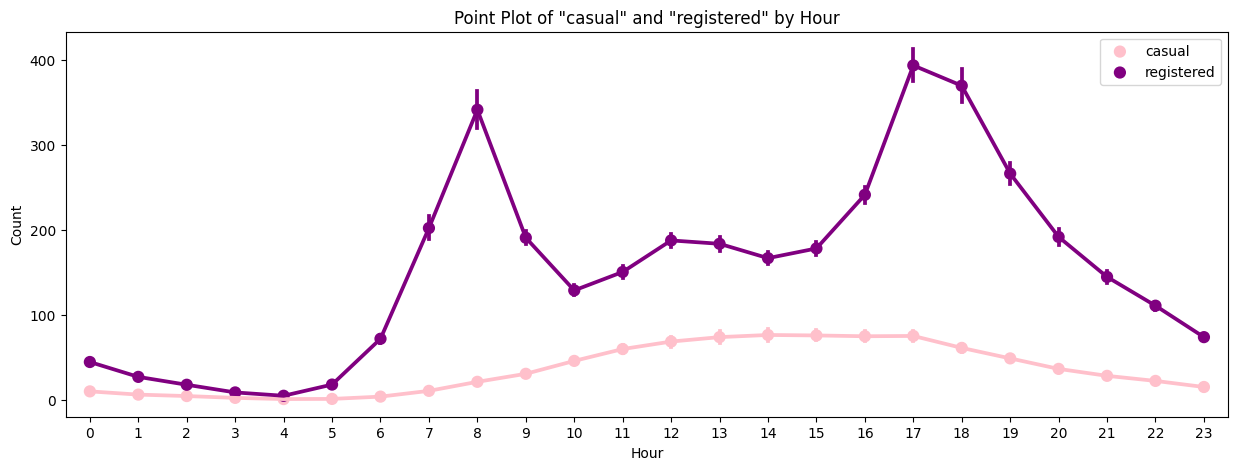

In [167]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Create a point plot for 'casual' and 'registered' by 'hour'
sns.pointplot(data=data, x='hour', y='casual', color='pink', label='casual')
sns.pointplot(data=data, x='hour', y='registered', color='purple', label='registered')

plt.title('Point Plot of "casual" and "registered" by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()

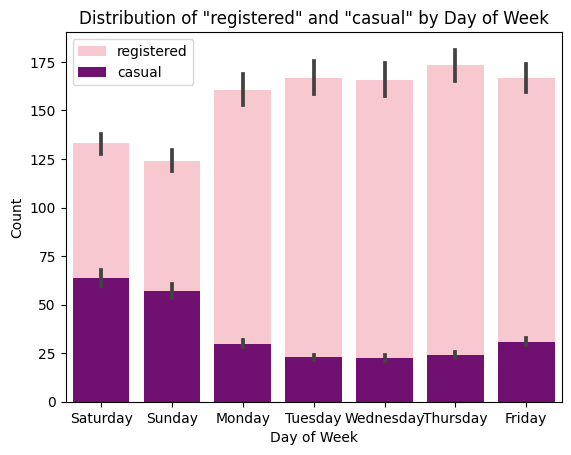

In [168]:
# Set up the plot
#plt.figure(figsize=(10, 6))

# Create a bar plot to visualize distribution of 'registered' and 'casual' by 'day'
sns.barplot(data=data, x='day', y='registered', color='pink', label='registered')
sns.barplot(data=data, x='day', y='casual', color='purple', label='casual')

plt.title('Distribution of "registered" and "casual" by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()

plt.show()

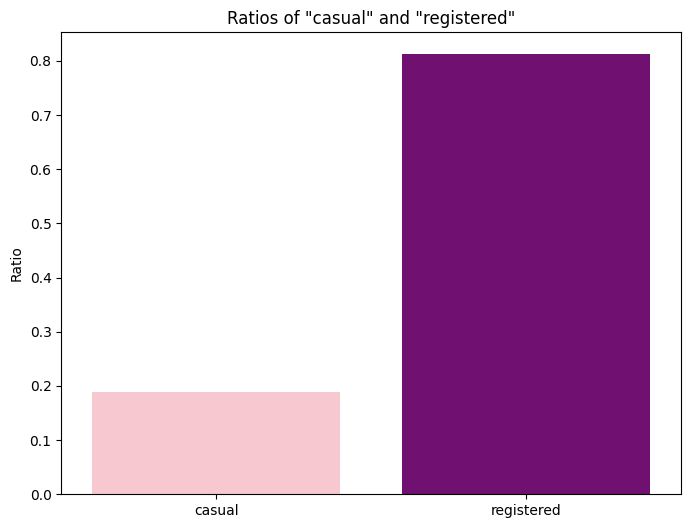

In [178]:
# Calculate the total counts for 'casual' and 'registered'
total_casual = data['casual'].sum()
total_registered = data['registered'].sum()

# Calculate the ratios
ratio_casual = total_casual / (total_casual + total_registered)
ratio_registered = total_registered / (total_casual + total_registered)

# Create a bar plot for the ratios of 'casual' and 'registered'
ratios = [ratio_casual, ratio_registered]
labels = ['casual', 'registered']
colors = ["pink", "purple"]
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=ratios, palette=colors)
plt.title('Ratios of "casual" and "registered"')
plt.ylabel('Ratio')
plt.show()

The graphs show a distinct trend: bike rentals are highest on workdays, followed by weekends and official holidays. Peak rental times consistently occur at 7 AM and 5 PM, except on Saturdays and Sundays when rentals surge from 11 AM to 5 PM.

The data also highlights that registered users mainly rent bikes on workdays, peaking at 7 AM and 5 PM. In contrast, casual users, who use bikes for leisure, are more active on weekends. Weekends have a different usage pattern, with fewer rentals overall and a higher proportion of casual users.

Interestingly, there are more registered users than casual users, indicating consistent bike usage by registered users on workdays compared to the varied casual usage on weekends.

In summary, this analysis reveals a clear connection between user types, workdays, and rental peak hours, improving our understanding of bike rental dynamics.

In [162]:
# Select features and target variable
#X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'day_of_week']]
#y = data['demand']